# E.D.A y Analisis API aviationstack

En este notebook hacemos el E.D.A a esta API (https://api.aviationstack.com/v1/airplanes), esto con el objetivo de Comprender los datos, Evaluar la calidad de los datos, Limpiar los datos, Reducir su complejidad y Sacar conclusiones sobre el contenido de este

Necesitamos traer los datos de vuelos del 2019 en USA

#### Añadimos el directorio raíz al sys.path para facilitar importaciones

In [8]:
import os

notebook_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
os.chdir(root_dir)

print("Directorio de trabajo actual después del cambio:", os.getcwd())

Directorio de trabajo actual después del cambio: /Users/admin/Documents/gustavo/Proyecto_Vuelos


#### Importamos las Librerias

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importamos la conexion 

In [9]:
api_airplanes=pd.read_csv("./csv/api_airlines.csv")
api_airplanes.head(5)


,id,fleet_average_age,airline_id,callsign,hub_code,iata_code,icao_code,country_iso2,date_founded,iata_prefix_accounting,airline_name,country_name,fleet_size,status,type
0,1838694,10.9,1,AMERICAN,DFW,AA,AAL,US,1934.0,1.0,American Airlines,United States,963.0,active,scheduled
1,1838695,17.0,2,DELTA,ATL,DL,DAL,US,1928.0,6.0,Delta Air Lines,United States,823.0,active,"scheduled,division"
2,1838696,13.8,3,UNITED,ORD,UA,UAL,US,1931.0,16.0,United Airlines,United States,715.0,active,"scheduled,division"
3,1838697,12.3,4,SOUTHWEST,DAL,WN,SWA,UM,1967.0,526.0,Southwest Airlines Co.,United States Minor Outlying Islands,712.0,active,scheduled
4,1838698,6.9,5,CHINA SOUTHERN,CAN,CZ,CSN,CN,2004.0,784.0,China Southern Airlines,China,498.0,active,scheduled


## Contexto de la API

La API de Aviationstack ofrece acceso sencillo a datos globales de aviación, incluyendo vuelos en tiempo real, históricos y futuros, así como rutas aéreas y otra información actualizada. Los datos se obtienen mediante solicitudes HTTP GET y se devuelven en formato JSON. La documentación es compatible con cualquier lenguaje de programación y proporciona guías de integración, explicaciones sobre endpoints, parámetros de solicitud y objetos de respuesta. Para dudas adicionales, se puede contactar al equipo de soporte de Aviationstack.

especificamente estamos extrayendo los datos de este endpoint : https://api.aviationstack.com/v1/airlines  que nos trae la informacion de todas las aerolineas del mundo

Columnas

In [89]:
api_airplanes.columns

Index(['id', 'fleet_average_age', 'airline_id', 'callsign', 'hub_code',
       'iata_code', 'icao_code', 'country_iso2', 'date_founded',
       'iata_prefix_accounting', 'airline_name', 'country_name', 'fleet_size',
       'status', 'type'],
      dtype='object')

- results: Devuelve un array de resultados, donde cada entrada representa los datos de una aerolínea en particular. Cada elemento del array incluye los detalles de las aerolíneas como se describe a continuación.

- airline_name: Devuelve el nombre completo de la aerolínea.

- iata_code: Devuelve el código IATA de la aerolínea, que es un código de dos letras único asignado por la Asociación Internacional de Transporte Aéreo (IATA).

- iata_prefix_accounting: Devuelve el prefijo o código contable de la aerolínea, utilizado en procesos administrativos y financieros de la industria.

- icao_code: Devuelve el código ICAO de la aerolínea, un código de tres letras asignado por la Organización de Aviación Civil Internacional (ICAO), que suele utilizarse en procedimientos de vuelo y control de tráfico aéreo.

- callsign: Devuelve el indicativo de llamada (callsign) de la aerolínea, usado en comunicaciones de radio durante las operaciones de vuelo.

- type: Devuelve el tipo de aerolínea, indicando si es, por ejemplo, una aerolínea comercial, de carga, de bajo costo, regional, etc.

- status: Devuelve el estado actual de la aerolínea, indicando si está operativa, inactiva o ha sido suspendida.

- fleet_size: Devuelve el tamaño de la flota de la aerolínea, es decir, el número total de aeronaves que posee o utiliza para sus operaciones.

- fleet_average_age: Devuelve la edad promedio de las aeronaves en la flota, lo cual es un indicador del envejecimiento de la flota.

- date_founded: Devuelve el año en que se fundó la aerolínea.

- hub_code: Devuelve el código del hub o centro de conexiones principal de la aerolínea, donde tiene su base principal de operaciones.

- country_name: Devuelve el nombre del país de origen de la aerolínea.

- country_iso2: Devuelve el código ISO de dos letras del país de origen de la aerolínea, utilizado para identificar el país de manera estandarizada (por ejemplo, "US" para Estados Unidos).

dimensiones del dataset

In [90]:
num_rows, num_columns = api_airplanes.shape
print(f"Tamaño del Dataset: {num_rows} filas y {num_columns} columnas")

Tamaño del Dataset: 13134 filas y 15 columnas


seleccionamos las filas donde country_name contiene "United States", sin distinguir entre mayúsculas y minúsculas. También evitando errores en caso de valores nulos (na=False).

esto lo hacemos , con el fin de quedarnos solo con las aerolineas de Estados Unidos , que son las que estamos usando para este analisis

In [91]:
api_airplanes = api_airplanes[api_airplanes['country_name'].str.contains('United States', case=False, na=False)]
api_airplanes

,id,fleet_average_age,airline_id,callsign,hub_code,iata_code,icao_code,country_iso2,date_founded,iata_prefix_accounting,airline_name,country_name,fleet_size,status,type
0,1838694,10.9,1,AMERICAN,DFW,AA,AAL,US,1934.0,1.0,American Airlines,United States,963.0,active,scheduled
1,1838695,17.0,2,DELTA,ATL,DL,DAL,US,1928.0,6.0,Delta Air Lines,United States,823.0,active,"scheduled,division"
2,1838696,13.8,3,UNITED,ORD,UA,UAL,US,1931.0,16.0,United Airlines,United States,715.0,active,"scheduled,division"
3,1838697,12.3,4,SOUTHWEST,DAL,WN,SWA,UM,1967.0,526.0,Southwest Airlines Co.,United States Minor Outlying Islands,712.0,active,scheduled
6,1838700,11.1,7,SKYWEST,SLC,OO,SKW,UM,1972.0,302.0,SkyWest Airlines,United States Minor Outlying Islands,382.0,active,scheduled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13111,1851805,NaN,13113,TANGI,NaN,NaN,WHR,US,NaN,NaN,Hummingbird Aviation,United States,NaN,active,NaN
13118,1851812,NaN,13120,WIGGINS AIRWAYS,MHT,NaN,WIG,US,NaN,NaN,Wiggins Airways,United States,NaN,active,cargo
13121,1851815,NaN,13123,NaN,HIO,NaN,WIL,US,NaN,NaN,Aero Air,United States,NaN,active,private
13123,1851817,NaN,13125,WISCAIR,NaN,NaN,WIS,US,NaN,NaN,Paccair,United States,NaN,active,cargo


In [92]:
num_rows, num_columns = api_airplanes.shape
print(f"Tamaño del Dataset: {num_rows} filas y {num_columns} columnas")

Tamaño del Dataset: 1815 filas y 15 columnas


In [95]:
carrier_name_counts = api_airplanes['country_name'].value_counts().reset_index()
carrier_name_counts.columns = ['value', 'count']
print(carrier_name_counts)

                                  value  count
0                         United States   1766
1  United States Minor Outlying Islands     49


podemos observar que en el pais hay tres formas diferentes de llamar al mismo pais , entonces vamos a estandarizar United states y United States of America y dejaremos "United States Minor Outlying Islands" tal cual ya que nos puede interezar analizar las islas por fuera de estados unidos que pertenecen a el 

In [94]:
api_airplanes['country_name']=api_airplanes['country_name'].replace("United States of America" , "United States")
api_airplanes

,id,fleet_average_age,airline_id,callsign,hub_code,iata_code,icao_code,country_iso2,date_founded,iata_prefix_accounting,airline_name,country_name,fleet_size,status,type
0,1838694,10.9,1,AMERICAN,DFW,AA,AAL,US,1934.0,1.0,American Airlines,United States,963.0,active,scheduled
1,1838695,17.0,2,DELTA,ATL,DL,DAL,US,1928.0,6.0,Delta Air Lines,United States,823.0,active,"scheduled,division"
2,1838696,13.8,3,UNITED,ORD,UA,UAL,US,1931.0,16.0,United Airlines,United States,715.0,active,"scheduled,division"
3,1838697,12.3,4,SOUTHWEST,DAL,WN,SWA,UM,1967.0,526.0,Southwest Airlines Co.,United States Minor Outlying Islands,712.0,active,scheduled
6,1838700,11.1,7,SKYWEST,SLC,OO,SKW,UM,1972.0,302.0,SkyWest Airlines,United States Minor Outlying Islands,382.0,active,scheduled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13111,1851805,NaN,13113,TANGI,NaN,NaN,WHR,US,NaN,NaN,Hummingbird Aviation,United States,NaN,active,NaN
13118,1851812,NaN,13120,WIGGINS AIRWAYS,MHT,NaN,WIG,US,NaN,NaN,Wiggins Airways,United States,NaN,active,cargo
13121,1851815,NaN,13123,NaN,HIO,NaN,WIL,US,NaN,NaN,Aero Air,United States,NaN,active,private
13123,1851817,NaN,13125,WISCAIR,NaN,NaN,WIS,US,NaN,NaN,Paccair,United States,NaN,active,cargo


Revisamos el tipo de datos y la cantidad de valores unicos en el dataset 

In [96]:
summary = pd.DataFrame({
    'Tipo de Dato': api_airplanes.dtypes,
    'Valores Únicos': [api_airplanes[col].nunique() for col in api_airplanes.columns],
})

summary

,Tipo de Dato,Valores Únicos
id,int64,1815
fleet_average_age,float64,64
airline_id,int64,1815
callsign,object,1371
hub_code,object,207
iata_code,object,398
icao_code,object,1396
country_iso2,object,3
date_founded,float64,43
iata_prefix_accounting,float64,128


#### Limpieza de Datos 

##### Verificamos la calidad de los datos

Miramos si hay valores nulos 

In [99]:
print("Valores Nulos:")
valores_nulos = pd.DataFrame(api_airplanes.isnull().sum())
valores_nulos


Valores Nulos:


,0
id,0
airline_id,0
callsign,357
icao_code,188
country_iso2,37
airline_name,0
country_name,0
status,0


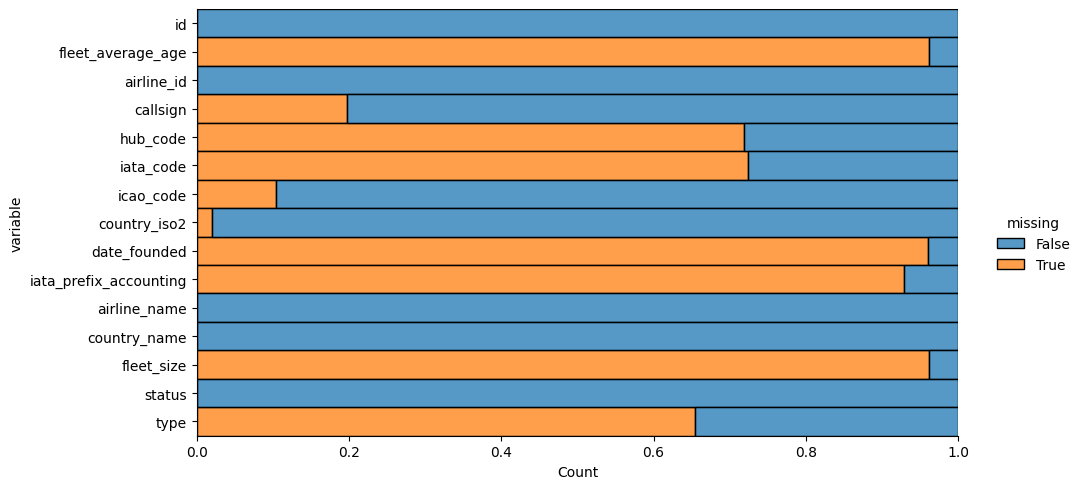

In [19]:
(
    api_airplanes
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

Como podemos observar las columnas: type , fleet_size , iata_prefix_accounting, date_founded, iata_code , hub_code , fleet_average_age

tienen  mas del 50% de sus valores en nulos , lo cual va ser muy dificil poder imputar y de ser asi , hay una gran probabilidad de que  no sea tan representativo a la realidad , por ende eliminamos esas columnas

In [98]:
columns_to_remove=["type" , "fleet_size" , "iata_prefix_accounting", "date_founded", "iata_code" , "hub_code", "fleet_average_age"]
api_airplanes = api_airplanes.drop(columns=columns_to_remove)
api_airplanes

,id,airline_id,callsign,icao_code,country_iso2,airline_name,country_name,status
0,1838694,1,AMERICAN,AAL,US,American Airlines,United States,active
1,1838695,2,DELTA,DAL,US,Delta Air Lines,United States,active
2,1838696,3,UNITED,UAL,US,United Airlines,United States,active
3,1838697,4,SOUTHWEST,SWA,UM,Southwest Airlines Co.,United States Minor Outlying Islands,active
6,1838700,7,SKYWEST,SKW,UM,SkyWest Airlines,United States Minor Outlying Islands,active
...,...,...,...,...,...,...,...,...
13111,1851805,13113,TANGI,WHR,US,Hummingbird Aviation,United States,active
13118,1851812,13120,WIGGINS AIRWAYS,WIG,US,Wiggins Airways,United States,active
13121,1851815,13123,NaN,WIL,US,Aero Air,United States,active
13123,1851817,13125,WISCAIR,WIS,US,Paccair,United States,active


Estas 3 columnas tienen nulos , vamos a analizarla una a una :
- callsign	357
- icao_code	188
- country_iso2	37

callsign

In [ ]:
total_rows = api_airplanes.shape[0]

print("Análisis de la columna 'callsign': \n")

null_count_callsign = api_airplanes['callsign'].isnull().sum()
print(f"  - Nulos: {null_count_callsign}")

null_percentage_callsign = (null_count_callsign / total_rows) * 100
print(f"  - Porcentaje de nulos: {null_percentage_callsign:.2f}%")

unique_values_callsign = api_airplanes['callsign'].nunique()
print(f"  - Valores únicos: {unique_values_callsign}")

value_counts_callsign = api_airplanes['callsign'].value_counts().head(10)
print("  - Distribución de valores (Top 10): \n")
print(value_counts_callsign)

Análisis de la columna 'callsign': 

  - Nulos: 357
  - Porcentaje de nulos: 19.67%
  - Valores únicos: 1371
  - Distribución de valores (Top 10): 

callsign
WINDYCITY         3
NORTHEAST         3
GALION            3
ERAH              3
WILLOW RUN        2
SOUTHERN SKIES    2
SONIC             2
STARBASE          2
RESPONSE          2
JET LINK          2
Name: count, dtype: int64


In [ ]:
# Muestra de filas con valores nulos
print("  - Muestra de filas con valores nulos en 'callsign': \n")
print(api_airplanes[api_airplanes['callsign'].isnull()])

  - Muestra de filas con valores nulos en 'callsign':

            id  airline_id callsign icao_code country_iso2  \
753    1839447         754      NaN       NaN           US   
757    1839451         758      NaN       NaN           US   
767    1839461         768      NaN       NaN           US   
772    1839466         773      NaN       NaN           US   
773    1839467         774      NaN       NaN           US   
...        ...         ...      ...       ...          ...   
12707  1851401       12709      NaN       USC           US   
13032  1851726       13034      NaN       WAE           US   
13035  1851729       13037      NaN       WAG           US   
13051  1851745       13053      NaN       WAW           US   
13121  1851815       13123      NaN       WIL           US   

                                     airline_name   country_name      status  
753          Radixx Solutions International, Inc.  United States      active  
757    Travelport Global Distribution Syst

Encontramos que la columna "callsign" no tiene mucha relevancia , ya que la columna airline_name puede ofrecer la misma informacion y mas precisa ,entonces por eso se eliminara del dataset 

In [112]:
api_airplanes=api_airplanes.drop(columns="callsign")
api_airplanes.head(5)

,id,airline_id,icao_code,country_iso2,airline_name,country_name,status
0,1838694,1,AAL,US,American Airlines,United States,active
1,1838695,2,DAL,US,Delta Air Lines,United States,active
2,1838696,3,UAL,US,United Airlines,United States,active
3,1838697,4,SWA,UM,Southwest Airlines Co.,United States Minor Outlying Islands,active
6,1838700,7,SKW,UM,SkyWest Airlines,United States Minor Outlying Islands,active


analizando icao_code

In [111]:
print("\nAnálisis de la columna 'icao_code': \n")

null_count_icao_code = api_airplanes['icao_code'].isnull().sum()
print(f"  - Nulos: {null_count_icao_code}")

null_percentage_icao_code = (null_count_icao_code / total_rows) * 100
print(f"  - Porcentaje de nulos: {null_percentage_icao_code:.2f}%")

unique_values_icao_code = api_airplanes['icao_code'].nunique()
print(f"  - Valores únicos: {unique_values_icao_code}")

value_counts_icao_code = api_airplanes['icao_code'].value_counts().head(10)
print("  - Distribución de valores (Top 10): \n")
print(value_counts_icao_code)



Análisis de la columna 'icao_code': 

  - Nulos: 188
  - Porcentaje de nulos: 10.36%
  - Valores únicos: 1396
  - Distribución de valores (Top 10): 

icao_code
CNV    4
RWG    4
HNA    3
PAI    3
FLG    3
BTA    3
SQH    3
USC    3
ALO    3
VIK    3
Name: count, dtype: int64


In [106]:
print("  - Muestra de filas con valores nulos en 'icao_code':")
print(api_airplanes[api_airplanes['icao_code'].isnull()])

  - Muestra de filas con valores nulos en 'icao_code':
           id  airline_id callsign icao_code country_iso2  \
753   1839447         754      NaN       NaN           US   
757   1839451         758      NaN       NaN           US   
767   1839461         768      NaN       NaN           US   
772   1839466         773      NaN       NaN           US   
773   1839467         774      NaN       NaN           US   
...       ...         ...      ...       ...          ...   
3803  1842497        3805      NaN       NaN           US   
3833  1842527        3835      NaN       NaN           US   
3877  1842571        3879      NaN       NaN           US   
3919  1842613        3921      NaN       NaN           US   
3933  1842627        3935      NaN       NaN           US   

                                    airline_name   country_name      status  
753         Radixx Solutions International, Inc.  United States      active  
757   Travelport Global Distribution System B.V.  United

Vamos a rellenar los nulos de la columna icao_code con 000  ya que no sabemos a que se deben esos nulos y en caso tal podriamos rellenarlos , con informacion nueva que se vaya agregando al dataset

In [113]:
api_airplanes['icao_code'] = api_airplanes['icao_code'].fillna('000')

country_iso2

In [117]:
print("\nAnálisis de la columna 'country_iso2':")

null_count_country_iso2 = api_airplanes['country_iso2'].isnull().sum()
print(f"  - Nulos: {null_count_country_iso2}")

null_percentage_country_iso2 = (null_count_country_iso2 / total_rows) * 100
print(f"  - Porcentaje de nulos: {null_percentage_country_iso2:.2f}%")

unique_values_country_iso2 = api_airplanes['country_iso2'].nunique()
print(f"  - Valores únicos: {unique_values_country_iso2}")

value_counts_country_iso2 = api_airplanes['country_iso2'].value_counts().head(10)
print("  - Distribución de valores (Top 10):")
print(value_counts_country_iso2)


Análisis de la columna 'country_iso2':
  - Nulos: 0
  - Porcentaje de nulos: 0.00%
  - Valores únicos: 2
  - Distribución de valores (Top 10):
country_iso2
US    1764
UM      51
Name: count, dtype: int64


Contamos conun contry_iso2 un poco raro que es el de UK que entraremos a analizar

In [115]:
api_airplanes_filtred=api_airplanes[api_airplanes["country_iso2"]=="UK"]
api_airplanes_filtred

,id,airline_id,icao_code,country_iso2,airline_name,country_name,status
7738,1846432,7740,HEM,UK,Hemmeter Aviation,United States,historical


segun fuentes oficiales : https://www.antillesairboats.com/hemmeter-aviation   

Hemmeter Aviation fue una división de Hemmeter Corporation, con sede en el Aeropuerto Internacional de Honolulu, Hawái, Estados Unidos. Inicialmente, comenzó como el departamento de vuelos corporativos para Chris Hemmeter, pero evolucionó hasta convertirse en una destacada operación de base fija (FBO) y terminal privada para aeronaves.

Entonces el country_iso2 lo cambiaremos a US

In [116]:
api_airplanes.loc[(api_airplanes['airline_name'] == 'Hemmeter Aviation') & (api_airplanes['country_iso2'] == 'UK'), 'country_iso2'] = 'US'

print(api_airplanes[api_airplanes['airline_name'] == 'Hemmeter Aviation'])

           id  airline_id icao_code country_iso2       airline_name  \
7738  1846432        7740       HEM           US  Hemmeter Aviation   

       country_name      status  
7738  United States  historical  


In [103]:
# Muestra de filas con valores nulos
print("  - Muestra de filas con valores nulos en 'callsign':")
print(api_airplanes[api_airplanes['country_iso2'].isnull()])

  - Muestra de filas con valores nulos en 'callsign':
Empty DataFrame
Columns: [id, airline_id, callsign, icao_code, country_iso2, airline_name, country_name, status]
Index: []


podemos imputar los datos de la columna country_iso2 , sabiendo que es US cuando el contry_name es "United States" y UM cuando es "United States Minor Outlying Islands"

In [102]:
api_airplanes.loc[(api_airplanes['country_name'] == 'United States') & (api_airplanes['country_iso2'].isnull()), 'country_iso2'] = 'US'

api_airplanes.loc[(api_airplanes['country_name'] == 'United States Minor Outlying Islands') & (api_airplanes['country_iso2'].isnull()), 'country_iso2'] = 'UM'

print("Valores nulos restantes en 'country_iso2':", api_airplanes['country_iso2'].isnull().sum())


Valores nulos restantes en 'country_iso2': 0


Miramos si hay valores duplicados 

In [118]:
print("\nValores Duplicados:")
print(f"Número de filas duplicadas: {api_airplanes.duplicated().sum()}")


Valores Duplicados:
Número de filas duplicadas: 0


No se encontraron valores duplicados

##### Buscamos datos atípicos 

Para las columnas del dia de la semana, mes y la que indica si un vuelo fue retrasado o no, traemos el valor minimo y maximo de para verificar que no hayan datos incoherentes 

In [132]:
max_month = api_airplanes['airline_id'].max()
min_month = api_airplanes['airline_id'].min()

print(f"Valor máximo de 'airline_id': {max_month}")
print(f"Valor mínimo de 'airline_id': {min_month}")


Valor máximo de 'airline_id': 13130
Valor mínimo de 'airline_id': 1


## Merge

In [180]:
flights=pd.read_csv('./csv/flights_cleaned.csv', delimiter=',', on_bad_lines='skip')
flights.head(5)

,month,day_of_week,dep_del15,dep_time_blk,distance_group,segment_number,concurrent_flights,number_of_seats,carrier_name,airport_flights_month,airline_flights_month,airline_airport_flights_month,avg_monthly_pass_airport,avg_monthly_pass_airline,plane_age,departing_airport,prcp,snow,tmax,awnd
0,July,Sunday,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,79247,7972,2006675.0,11744595.0,6.0,Douglas Municipal,0.0,0.0,95.0,42.5
1,April,Monday,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,67082,3655,2743323.0,3472966.0,15.0,Stapleton International,0.0,0.0,71.0,114.1
2,November,Thursday,0,0001-0559,2,1,3,76,Envoy Air,1148,25517,300,90547.0,1204766.0,3.0,Adams Field,0.0,0.0,54.0,4.5
3,March,Tuesday,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,114119,3282,1023434.0,13382999.0,19.0,San Diego International Lindbergh Fl,0.0,0.0,64.0,80.5
4,July,Wednesday,0,0800-0859,1,2,85,50,Envoy Air,29376,28267,6058,3103410.0,1204766.0,15.0,Chicago O'Hare International,0.1,0.0,94.0,105.1


Para unir estos dos conjuntos de datos basándote , primero necesitamos estandarizar los nombres en ambas tablas para que coincidan. Esto puede incluir eliminar palabras adicionales como "Inc.", "LLC", o puntos y comas, así como pasar todos los nombres a minúsculas para evitar discrepancias por mayúsculas/minúsculas. 

In [181]:
def normalize_airline_name(name):
    name = name.lower()
    name = name.replace('inc', '').replace('co.', '').replace('airways', 'airway').replace('lines', 'line').replace('airlines', 'airline').replace('llc', '').replace('.', '').replace(',', '').strip()
    return name

In [182]:
flights['carrier_name'] = flights['carrier_name'].apply(normalize_airline_name)
api_airplanes['airline_name'] = api_airplanes['airline_name'].apply(normalize_airline_name)

In [183]:
api_airplanes.head(5)

,id,airline_id,icao_code,country_iso2,airline_name,country_name,status
0,1838694,1,AAL,US,american airline,United States,active
1,1838695,2,DAL,US,delta air line,United States,active
2,1838696,3,UAL,US,united airline,United States,active
3,1838697,4,SWA,UM,southwest airline,United States Minor Outlying Islands,active
6,1838700,7,SKW,UM,skywest airline,United States Minor Outlying Islands,active


In [184]:
api_airplanes.shape

(1815, 7)

In [185]:
flights.head(5)

,month,day_of_week,dep_del15,dep_time_blk,distance_group,segment_number,concurrent_flights,number_of_seats,carrier_name,airport_flights_month,airline_flights_month,airline_airport_flights_month,avg_monthly_pass_airport,avg_monthly_pass_airline,plane_age,departing_airport,prcp,snow,tmax,awnd
0,July,Sunday,0,1500-1559,3,3,26,160,american airline,19534,79247,7972,2006675.0,11744595.0,6.0,Douglas Municipal,0.0,0.0,95.0,42.5
1,April,Monday,0,1300-1359,4,4,63,50,skywest airline,18788,67082,3655,2743323.0,3472966.0,15.0,Stapleton International,0.0,0.0,71.0,114.1
2,November,Thursday,0,0001-0559,2,1,3,76,envoy air,1148,25517,300,90547.0,1204766.0,3.0,Adams Field,0.0,0.0,54.0,4.5
3,March,Tuesday,0,1500-1559,7,5,14,143,southwest airline,7612,114119,3282,1023434.0,13382999.0,19.0,San Diego International Lindbergh Fl,0.0,0.0,64.0,80.5
4,July,Wednesday,0,0800-0859,1,2,85,50,envoy air,29376,28267,6058,3103410.0,1204766.0,15.0,Chicago O'Hare International,0.1,0.0,94.0,105.1


In [186]:
flights.shape

(1047730, 20)

Verificamos que en los datos de la api "api_airplanes" esten las mismas aerolineas que las que tenemos en la base de datos de "fligths"

In [187]:
airlines_to_filter = [
    "alaska airline",
    "allegiant air",
    "american airline",
    "eagle",
    "atlantic southeast airline",
    "comair",
    "delta air lines",
    "endeavor air",
    "frontier airline",
    "hawaiian airline",
    "jetblue",
    "mesa airline",
    "midwest airline",
    "skywest airline",
    "southwest airline",
    "spirit",
    "united",
    "envoy air"
]

df_filtered = api_airplanes[api_airplanes['airline_name'].str.contains('|'.join(airlines_to_filter), case=False, na=False)]
df_filtered.sort_values(by='airline_name')

,id,airline_id,icao_code,country_iso2,airline_name,country_name,status
11508,1850202,11510,SIP,US,air spirit,United States,active
28,1838722,29,ASA,US,alaska airline,United States,active
68,1838762,69,AAY,UM,allegiant air,United States Minor Outlying Islands,active
0,1838694,1,AAL,US,american airline,United States,active
3697,1842391,3699,000,US,american eagle airline (1980),United States,disabled
4806,1843500,4808,ASE,US,atlantic southeast airline,United States,historical
5589,1844283,5591,CBH,US,corporate eagle management services,United States,active
2829,1841523,2831,COM,US,delta connection comair,United States,historical
8053,1846747,8055,ICR,US,eagle aero,United States,active
6455,1845149,6457,E13,US,eagle air transport,United States,active


Podemos observar que estan todos los  que estan en el dataset de la base de datos , solo que con diferentes nombres y tambien hay aerolinas que cambiaron su nombre durante la historia status "historical"  y tamabien otras que ya no existen o lo desactivaron "disable"

y comair aparece asi por que segun diferentes fuentes cerro en 2012 : https://es.wikipedia.org/wiki/Comair

In [188]:
df_filtered.shape

(50, 7)

In [195]:
carrier_name_counts = flights['carrier_name'].value_counts().reset_index()
carrier_name_counts.columns = ['value', 'count']
print(carrier_name_counts.sort_values(by='value'))

                         value   count
7               alaska airline   38938
16               allegiant air    6761
2             american airline  145919
14  atlantic southeast airline   15874
9                       comair   35322
1               delta air line  152319
10                endeavor air   32637
8                    envoy air   37053
13            frontier airline   19715
15            hawaiian airline   12145
6               jetblue airway   43243
12                mesa airline   28690
5              midwest airline   48448
4              skywest airline   94620
0            southwest airline  208986
11                      spirit   30101
3               united airline   96959


In [194]:
carrier_name_counts = df_filtered['airline_name'].value_counts().reset_index()
carrier_name_counts.columns = ['value', 'count']
print(carrier_name_counts.sort_values(by='value'))

                                               value  count
7                                     alaska airline      1
11                                     allegiant air      1
6                                   american airline      1
25                     american eagle airline (1980)      1
27                        atlantic southeast airline      1
20                                            comair      1
28               corporate eagle management services      1
37                                        eagle aero      1
31                               eagle air transport      1
22                                     eagle airline      1
26                            eagle aviaton services      1
16                              eagle canyon airline      1
32                            eagle commuter airline      1
34                                 eagle helicopters      1
36                                eagle jet aviation      1
33                                      

### Dataset flights :
- 1. spirit air line, 
  2. united air line, 
  3. midwest airline 
  4. jetblue airway
  5. comair 
  6. Envoy Air

### Dataset api_airplanes :
- 1. air spirit
  2. united airline 
  3. trans midwest airline
  4. jetblue 
  5. delta connection comair 
  6. Envoy Air

In [ ]:
def standardize_name(name):
    name = name.lower().strip()
    
    replacements = {
        'spirit air line': 'spirit',
        'air spirit': 'spirit',
        'united air line': 'united airline',
        'united airline': 'united airline',
        'midwest airline': 'midwest airline',
        'trans midwest airline': 'midwest airline',
        'jetblue': 'jetblue airway',
        'comair': 'comair',
        'delta connection comair': 'comair',
        'envoy air': 'envoy air'
    }
    
    if name in replacements:
        name = replacements[name]
    
    return name

flights['carrier_name'] = flights['carrier_name'].apply(standardize_name)
api_airplanes['airline_name'] = api_airplanes['airline_name'].apply(standardize_name)


/var/folders/q1/5dh64yhx1c70xmzjkwz67x780000gn/T/ipykernel_6845/3285861391.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['airline_name'] = df_filtered['airline_name'].apply(standardize_name)


In [196]:
merged_df = pd.merge(flights, api_airplanes, left_on='carrier_name', right_on='airline_name', how='inner')
print(merged_df.head())


      month day_of_week  dep_del15 dep_time_blk  distance_group  \
0      July      Sunday          0    1500-1559               3   
1     April      Monday          0    1300-1359               4   
2  November    Thursday          0    0001-0559               2   
3     March     Tuesday          0    1500-1559               7   
4      July   Wednesday          0    0800-0859               1   

   segment_number  concurrent_flights  number_of_seats       carrier_name  \
0               3                  26              160   american airline   
1               4                  63               50    skywest airline   
2               1                   3               76          envoy air   
3               5                  14              143  southwest airline   
4               2                  85               50          envoy air   

   airport_flights_month  ...  snow  tmax   awnd       id  airline_id  \
0                  19534  ...   0.0  95.0   42.5  1838694    

In [197]:
merged_df.shape

(1097546, 27)

In [198]:
print("Valores Nulos:")
valores_nulos = pd.DataFrame(merged_df.isnull().sum())
valores_nulos


Valores Nulos:


,0
month,0
day_of_week,0
dep_del15,0
dep_time_blk,0
distance_group,0
segment_number,0
concurrent_flights,0
number_of_seats,0
carrier_name,0
airport_flights_month,0


In [199]:
carrier_name_counts = merged_df['carrier_name'].value_counts().reset_index()
carrier_name_counts.columns = ['value', 'count']
print(carrier_name_counts.sort_values(by='value'))

                         value   count
9               alaska airline   38938
16               allegiant air    6761
2             american airline  145919
14  atlantic southeast airline   15874
11                      comair   35322
1               delta air line  152319
12                endeavor air   32637
10                   envoy air   37053
8             frontier airline   39430
15            hawaiian airline   12145
7               jetblue airway   43243
13                mesa airline   28690
6              midwest airline   48448
4              skywest airline   94620
0            southwest airline  208986
5                       spirit   60202
3               united airline   96959


Podemos ver de que logramos a hacer merge con ambos datasets y nos quedan los diferentes aerolineas que estamos analizando

verificamos duplicados

In [201]:
print("\nValores Duplicados:")
print(f"Número de filas duplicadas: {api_airplanes.duplicated().sum()}")


Valores Duplicados:
Número de filas duplicadas: 0


Exportar CSV

In [ ]:
import os

file_path = 'csv/merged_flights_api_airplanes.csv'

if not os.path.exists(file_path):
    merged_df.to_csv(file_path, index=False)
    print(f"Archivo exportado a: {file_path}")
else:
    print(f"El archivo ya existe en la ruta: {file_path}")

Archivo exportado a: csv/merged_flights_api_airplanes.csv
